# Loading and Exploring the Data from the Dataset

In [1]:
# import packages
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# data url path
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter03/bank-full.csv'

In [3]:
# load data
bankData = pd.read_csv(file_url, sep=';')
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# print the shape of the data
print(bankData.shape)

(45211, 17)


In [5]:
# summary of numerical raw data
bankData.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Business Hypothesis Testing for Age versus Propensity for a Term Loan

In [6]:
# import package
import altair as alt

In [7]:
# count the number of records for each age group
filter_mask = bankData['y'] == 'yes'

bankSub1 = bankData[filter_mask].groupby('age')['y'].agg(agegrp='count').reset_index()

In [8]:
# plot a line chart using altair
alt.Chart(bankSub1).mark_line().encode(x='age', y='agegrp')

<VegaLite 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [9]:
# Group the data per age 
ageTot = bankData.groupby('age')['y'].agg(ageTot='count').reset_index()
ageTot.head()

,age,ageTot
0,18,12
1,19,35
2,20,50
3,21,79
4,22,129


In [10]:
# group the data by both age and propensity of purchase
ageProp = bankData.groupby(['age', 'y'])['y'].agg(ageCat='count').reset_index()
ageProp.head()

,age,y,ageCat
0,18,no,5
1,18,yes,7
2,19,no,24
3,19,yes,11
4,20,no,35


In [11]:
# Merge both of these DataFrames and then divide each category of propensity 
# within each age group by the total customers in the respective age group to get the proportion of customers
ageComb = pd.merge(ageProp, ageTot, left_on=['age'], right_on=['age'])
ageComb['catProp'] = (ageComb.ageCat/ageComb.ageTot)*100
ageComb.head()

,age,y,ageCat,ageTot,catProp
0,18,no,5,12,41.666667
1,18,yes,7,12,58.333333
2,19,no,24,35,68.571429
3,19,yes,11,35,31.428571
4,20,no,35,50,70.000000


In [12]:
# display the proportion where you plot both categories (yes and no) as separate plots
alt.Chart(ageComb).mark_line().encode(x='age', y='catProp').facet(column='y')

<VegaLite 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


# Feature Engineering – Exploration of Individual Feature

In [13]:
# find a relationship between housing and the propensity for term deposits
bankData.groupby(['housing', 'y'])['y'].agg(houseTot='count').reset_index()

,housing,y,houseTot
0,no,no,16727
1,no,yes,3354
2,yes,no,23195
3,yes,yes,1935


In [14]:
# Explore the 'loan' variable to find its relationship with the propensity for a term deposit
bankData.groupby(['loan', 'y'])['y'].agg(loanTot='count').reset_index()

,loan,y,loanTot
0,no,no,33162
1,no,yes,4805
2,yes,no,6760
3,yes,yes,484


In [15]:
# find quantile values
import numpy as np
np.quantile(bankData['balance'], [0.25, 0.5, 0.75])

array([  72.,  448., 1428.])

In [16]:
# convert numerical values into categorical values
bankData['balanceClass'] = 'Quant1'
bankData.loc[(bankData['balance'] > 72) & (bankData['balance'] < 448), 'balanceClass'] = 'Quant2'
bankData.loc[(bankData['balance'] > 448) & (bankData['balance'] < 1428), 'balanceClass'] = 'Quant3'
bankData.loc[bankData['balance'] > 1428, 'balanceClass'] = 'Quant4'
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1


In [17]:
#  find the propensity of term deposit purchases based on each quantile the customers fall into
balanceTot = bankData.groupby(['balanceClass'])['y'].agg(balanceTot='count').reset_index()
balanceTot

,balanceClass,balanceTot
0,Quant1,11340
1,Quant2,11275
2,Quant3,11299
3,Quant4,11297


In [18]:
# calculate the total number of customers categorized by quantile and propensity classification
balanceProp = bankData.groupby(['balanceClass', 'y'])['y'].agg(balanceCat='count').reset_index()
balanceProp

,balanceClass,y,balanceCat
0,Quant1,no,10517
1,Quant1,yes,823
2,Quant2,no,10049
3,Quant2,yes,1226
4,Quant3,no,9884
5,Quant3,yes,1415
6,Quant4,no,9472
7,Quant4,yes,1825


In [19]:
# merge both dataframes
balanceComb = pd.merge(balanceProp, balanceTot, on=['balanceClass'])
balanceComb['catProp'] = (balanceComb.balanceCat / balanceComb.balanceTot) * 100
balanceComb

,balanceClass,y,balanceCat,balanceTot,catProp
0,Quant1,no,10517,11340,92.742504
1,Quant1,yes,823,11340,7.257496
2,Quant2,no,10049,11275,89.126386
3,Quant2,yes,1226,11275,10.873614
4,Quant3,no,9884,11299,87.476768
5,Quant3,yes,1415,11299,12.523232
6,Quant4,no,9472,11297,83.845269
7,Quant4,yes,1825,11297,16.154731


# Feature Engineering – Creating New Features from Existing Ones

In [20]:
#  normalize the numerical variables
from sklearn import preprocessing
x = bankData[['balance']].values.astype(float)

minmaxScaler = preprocessing.MinMaxScaler()
bankData['balanceTran'] = minmaxScaler.fit_transform(x)

In [21]:
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092259
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073067
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072822
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086476
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072812


In [22]:
# add a small value of 0.001 so as to eliminate the 0 values in the variable
bankData['balanceTran'] = bankData['balanceTran'] + 0.00001

The purpose of adding this small value is because, in the subsequent steps, we will be multiplying three transformed variables together to form a composite index. The small value is added to avoid the variable values becoming 0 during the multiplying operation.

In [23]:
# add two additional columns for introducing the transformed variables for loans and housing
bankData['loanTran'] = 1
# Giving a weight of 5 if there is no loan
bankData.loc[bankData['loan'] == 'no', 'loanTran'] = 5
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092269,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073077,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072832,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086486,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072822,5


We transformed values for the loan data as per the weighting approach. When a customer has a loan, it is given a weight of 1, and when there's no loan, the weight assigned is 5. The value of 1 and 5 are intuitive weights we are assigning. What values we assign can vary based on the business context you may be provided with.

In [24]:
# transform values for the Housing data
bankData['houseTran'] = 5

In [25]:
# Give a weight of 1 if the customer has a house
bankData.loc[bankData['housing'] == 'no', 'houseTran'] = 1
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,unknown,no,Quant4,0.092269,5,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,unknown,no,Quant1,0.073077,5,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,76,1,-1,0,unknown,no,Quant1,0.072832,1,5
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,92,1,-1,0,unknown,no,Quant4,0.086486,5,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,198,1,-1,0,unknown,no,Quant1,0.072822,5,1


Once all the transformed variables are created, we can multiply all of the transformed variables together to create a new index called assetIndex. This is a composite index that represents the combined effect of all three variables.

In [26]:
bankData['assetIndex'] = bankData['balanceTran'] * bankData['loanTran'] * bankData['houseTran']
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,unknown,no,Quant4,0.092269,5,5,2.306734
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,-1,0,unknown,no,Quant1,0.073077,5,5,1.826916
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,-1,0,unknown,no,Quant1,0.072832,1,5,0.364158
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,-1,0,unknown,no,Quant4,0.086486,5,5,2.162153
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,-1,0,unknown,no,Quant1,0.072822,5,1,0.364112


In [27]:
# Explore the propensity with respect to the composite index
np.quantile(bankData['assetIndex'],[0.25,0.5,0.75])

bankData['assetClass'] = 'Quant1'
bankData.loc[(bankData['assetIndex'] > 0.38) & (bankData['assetIndex'] < 0.57), 'assetClass'] = 'Quant2'
bankData.loc[(bankData['assetIndex'] > 0.57) & (bankData['assetIndex'] < 1.9), 'assetClass'] = 'Quant3'
bankData.loc[bankData['assetIndex'] > 1.9, 'assetClass'] = 'Quant4'
bankData.assetClass[bankData['assetIndex'] > 1.9] = 'Quant4'
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex,assetClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,-1,0,unknown,no,Quant4,0.092269,5,5,2.306734,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,-1,0,unknown,no,Quant1,0.073077,5,5,1.826916,Quant3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,-1,0,unknown,no,Quant1,0.072832,1,5,0.364158,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,-1,0,unknown,no,Quant4,0.086486,5,5,2.162153,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,-1,0,unknown,no,Quant1,0.072822,5,1,0.364112,Quant1


In [28]:
# Calculate the total of each asset class and the category-wise counts
assetTot = bankData.groupby('assetClass')['y'].agg(assetTot='count').reset_index()
assetProp = bankData.groupby(['assetClass', 'y'])['y'].agg(assetCat='count').reset_index()

In [29]:
# merge both dataframes
assetComb = pd.merge(assetProp, assetTot, on=['assetClass'])
assetComb['catProp'] = (assetComb.assetCat / assetComb.assetTot) * 100
assetComb

,assetClass,y,assetCat,assetTot,catProp
0,Quant1,no,10921,12212,89.428431
1,Quant1,yes,1291,12212,10.571569
2,Quant2,no,8436,10400,81.115385
3,Quant2,yes,1964,10400,18.884615
4,Quant3,no,10144,11121,91.214819
5,Quant3,yes,977,11121,8.785181
6,Quant4,no,10421,11478,90.791079
7,Quant4,yes,1057,11478,9.208921


# Finding the Correlation in Data to Generate a Correlation Plot Using Bank Data

In [30]:
# import package
from pandas import set_option

In [31]:
# create a variable that would store numerical variables
bankNumeric = bankData[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]

In [32]:
# use the .corr() function
set_option('display.width', 150)
set_option('precision', 3)
bankCorr = bankNumeric.corr(method = 'pearson')
bankCorr

,age,balance,day,duration,campaign,pdays,previous
age,1.000,0.098,-0.009,-0.005,0.005,-0.024,0.001
balance,0.098,1.000,0.005,0.022,-0.015,0.003,0.017
day,-0.009,0.005,1.000,-0.030,0.162,-0.093,-0.052
duration,-0.005,0.022,-0.030,1.000,-0.085,-0.002,0.001
campaign,0.005,-0.015,0.162,-0.085,1.000,-0.089,-0.033
pdays,-0.024,0.003,-0.093,-0.002,-0.089,1.000,0.455
previous,0.001,0.017,-0.052,0.001,-0.033,0.455,1.000


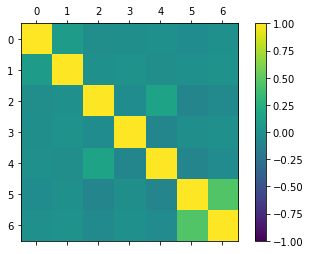

In [33]:
# plot the correlation matrix (heatmap)
from matplotlib import pyplot
corFig = pyplot.figure()
figAxis = corFig.add_subplot(111)
corAx = figAxis.matshow(bankCorr, vmin=-1, vmax=1)
corFig.colorbar(corAx)
pyplot.show()

# A Logistic Regression Model for Predicting the Propensity of Term Deposit Purchases in a Bank

In [34]:
# import packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [35]:
# find the data types
bankData.dtypes

age               int64
job              object
marital          object
education        object
default          object
balance           int64
housing          object
loan             object
contact          object
day               int64
month            object
duration          int64
campaign          int64
pdays             int64
previous          int64
poutcome         object
y                object
balanceClass     object
balanceTran     float64
loanTran          int64
houseTran         int64
assetIndex      float64
assetClass       object
dtype: object

In [36]:
# Convert the ordinal data into dummy data
bankCat = pd.get_dummies(bankData[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']])
bankCat.shape

(45211, 44)

In [37]:
# separate the numerical variables
bankNum = bankData[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
bankNum.shape

(45211, 7)

In [38]:
# prepare the X and Y variables
X = pd.concat([bankCat, bankNum], axis=1)
print(X.shape)
y = bankData['y']
print(y.shape)

(45211, 51)
(45211,)


In [39]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [40]:
# create the LogisticRegression model
bankModel = LogisticRegression()
bankModel.fit(X_train, y_train)

LogisticRegression()

In [41]:
# make predictions and calculate accuracy
pred = bankModel.predict(X_test)
print(f'Accuracy of Logistic Regression Model prediction on test set: {round(bankModel.score(X_test, y_test), 2)}')

Accuracy of Logistic Regression Model prediction on test set: 0.89


In [42]:
# print the confusion matrix
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test ,pred)
print(confusionMatrix)

[[11754   244]
 [ 1242   324]]


In [43]:
# generate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94     11998
         yes       0.57      0.21      0.30      1566

    accuracy                           0.89     13564
   macro avg       0.74      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564

